In [1]:
!pip install tensorflow

In [30]:
!pip install pandas_datareader

In [3]:
!pip install scikit-learn

In [75]:
import sklearn

In [116]:
import pandas as pd
import numpy as np

from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.Layers import Dense, LSTM

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
# data = pd.read_csv("Tesla.csv")
# data['Date'] = pd.to_datetime(data.Date)
# data = data.set_index(['Date'])
# data


In [119]:
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)
data = DataReader(
            'GOOG',
            'yahoo',
            start=start,
            end=end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,645.379028,632.250000,645.000000,642.679993,1572600,642.679993
2015-08-07,642.679993,629.710022,640.229980,635.299988,1403900,635.299988
2015-08-10,643.440002,631.249023,639.479980,633.729980,1809200,633.729980
2015-08-11,674.900024,654.270020,669.200012,660.780029,5029200,660.780029
2015-08-12,665.000000,652.289978,663.080017,659.559998,2936700,659.559998
2015-08-13,664.500000,651.661011,659.322021,656.450012,1810700,656.450012
2015-08-14,659.854980,652.659973,655.010010,657.119995,1072100,657.119995
2015-08-17,661.380005,651.239990,656.799988,660.869995,1051700,660.869995
2015-08-18,664.000000,653.460022,661.900024,656.130005,1456100,656.130005


In [120]:
# data['Date'] = pd.to_datetime(data.index, format='%y-%m-%d', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-08-06 to 2020-08-06
Data columns (total 6 columns):
High         1260 non-null float64
Low          1260 non-null float64
Open         1260 non-null float64
Close        1260 non-null float64
Volume       1260 non-null int64
Adj Close    1260 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


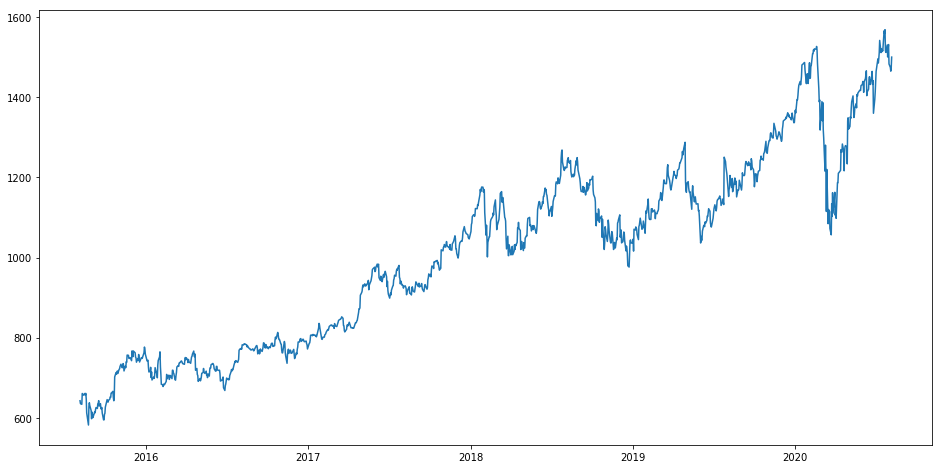

In [121]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

In [122]:
dataset = pd.DataFrame(index=(range(0,len(data))),columns=['Date','Close'])
data = data.sort_index(ascending=True, axis=0)
dataset['Date'] = data.index
dataset = dataset.set_index(['Date'])
dataset['Close'] = data['Close']
# data['Date']

dataset

,Close
Date,
2015-08-06,642.679993
2015-08-07,635.299988
2015-08-10,633.729980
2015-08-11,660.780029
2015-08-12,659.559998
2015-08-13,656.450012
2015-08-14,657.119995
2015-08-17,660.869995
2015-08-18,656.130005


In [123]:
split = int(len(dataset)*0.75)
X = dataset.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[0.06145393],
       [0.0539724 ],
       [0.05238079],
       ...,
       [0.89505589],
       [0.90381476],
       [0.93066917]])

In [124]:
train = scaled_data[:split,:]
valid = scaled_data[split:,:]
X_train = []
y_train = []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(885, 60, 1)

In [125]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer= 'adam',
             loss = 'mean_squared_error')


In [126]:
model.fit(X_train, 
          y_train,
         epochs=2)

Train on 885 samples
Epoch 1/2
885/885 [==============================] - 4s 4ms/sample - loss: 0.0210
Epoch 2/2
885/885 [==============================] - 1s 1ms/sample - loss: 0.0019


In [127]:
test_data  = scaled_data[split-60:,:]
X_test = []
for i in range(60,(len(test_data))):
    X_test.append(test_data[i-60:i,:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = X[split:,:]
result = model.predict(X_test)
result = scaler.inverse_transform(result)

rmse = np.sqrt(np.mean((y_test-result)**2))


In [128]:
test = pd.DataFrame(index=dataset[split:].index, columns=['Close'])
# test['Date'] = dataset[split:].index
test['Close'] = result
# test = test.set_index(['Date'])
test

,Close
Date,
2019-05-09,1206.225220
2019-05-10,1201.258789
2019-05-13,1196.357422
2019-05-14,1190.579956
2019-05-15,1183.985718
2019-05-16,1178.547729
2019-05-17,1174.626587
2019-05-20,1171.313477
2019-05-21,1167.709351


RMS error for this dataset is:  60.8691671883373

Below shown is the graph suggesting the predicted values vs Actual values of the closing price of Tesla stock for the respective dates


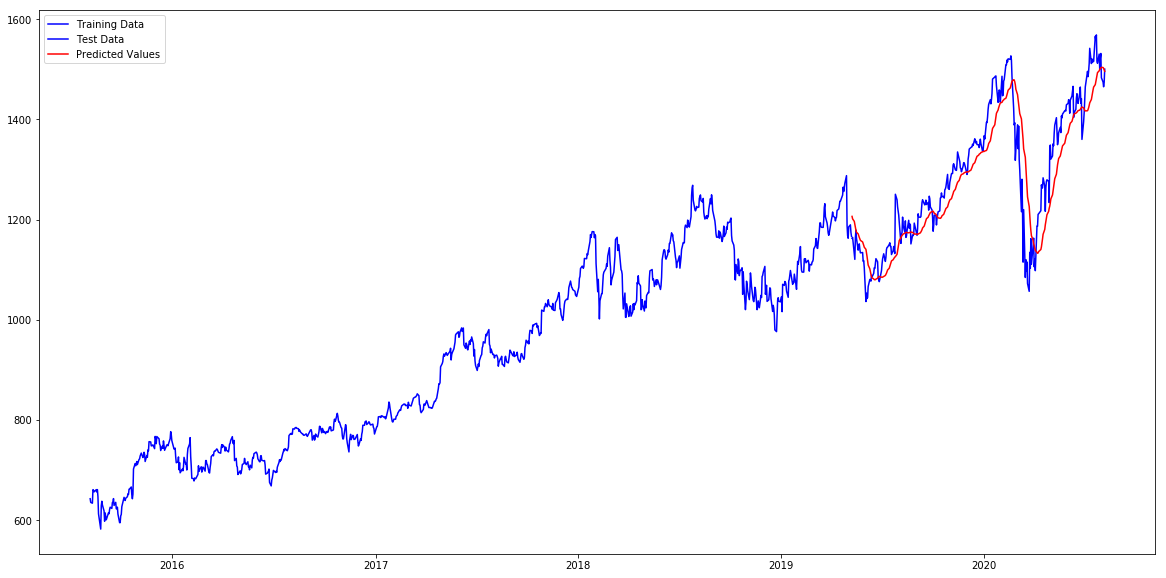

In [129]:
plt.figure(figsize=(20,10))
plt.plot(dataset[:split], label='Training Data', color='blue')
plt.plot(dataset[split:], label='Test Data', color='blue')
plt.plot(test['Close'], label='Predicted Values', color='red')
plt.legend()
plt.savefig("Google.jpg", dpi=300, bbox_inches='tight')
print("RMS error for this dataset is: ", rmse)
print()
print("Below shown is the graph suggesting the predicted values vs Actual values of the closing price of Tesla stock for the respective dates")